### Albion Data Collector

In [1]:
import pandas as pd
import sqlite3
import requests

In [2]:
#Подключаем файл с предметами
#T5_BAG
url = "https://west.albion-online-data.com/api/v2/stats/Prices/"
search_params = {
    'qualities': [1, 2, 3, 4, 5]
}

In [3]:
#читаю csv и собираю датафреймы
df_items = pd.read_csv("items.csv", sep = ";")
df_world = pd.read_csv("world.csv", sep = ";")
#df.columns = ["index", "name", "Coment"]
round(len(df_items['Name'])/275)

36

In [8]:
#счетчики для индексов строк
i = 0
j = i+100

for n in range(round(len(df_items['Name'])/100)):
    
    items_str = str(df_items['Name'].tolist()[i].strip())
    
    #формируем строку запроса
    for k in df_items['Name'].tolist()[i+1:j]:
        items_str = items_str + ',' + k.strip()
    items_str = items_str + '.json' + '?qualities=1,2,3,4,5'

    #читаем json, записываем в базу данных под управлением sqlite
    #для каждого запроса своя таблица
    df_json = pd.read_json(url + items_str)
    df_json_selected = df_json.loc[(df_json.sell_price_min > 0) &\
                                   (df_json.sell_price_max > 0) &\
                                   (df_json.buy_price_min > 0) &\
                                   (df_json.buy_price_max > 0)]
    df_json_selected.to_sql("Prices_Items", sqlite3.Connection("Albion_Data.db"), if_exists = "append")
    
    #инкерментируем счетчик
    i = j
    j = j + 100
    
    print("Albion_Data_Items" + str(n)) #для отладки, имя таблицы выводится в чат

Albion_Data_Items0
Albion_Data_Items1
Albion_Data_Items2
Albion_Data_Items3
Albion_Data_Items4
Albion_Data_Items5
Albion_Data_Items6
Albion_Data_Items7
Albion_Data_Items8
Albion_Data_Items9
Albion_Data_Items10
Albion_Data_Items11
Albion_Data_Items12
Albion_Data_Items13
Albion_Data_Items14
Albion_Data_Items15
Albion_Data_Items16
Albion_Data_Items17
Albion_Data_Items18
Albion_Data_Items19
Albion_Data_Items20
Albion_Data_Items21
Albion_Data_Items22
Albion_Data_Items23
Albion_Data_Items24
Albion_Data_Items25
Albion_Data_Items26
Albion_Data_Items27
Albion_Data_Items28
Albion_Data_Items29
Albion_Data_Items30
Albion_Data_Items31
Albion_Data_Items32
Albion_Data_Items33
Albion_Data_Items34
Albion_Data_Items35
Albion_Data_Items36
Albion_Data_Items37
Albion_Data_Items38
Albion_Data_Items39
Albion_Data_Items40
Albion_Data_Items41
Albion_Data_Items42
Albion_Data_Items43
Albion_Data_Items44
Albion_Data_Items45
Albion_Data_Items46
Albion_Data_Items47
Albion_Data_Items48
Albion_Data_Items49
Albion_Dat

# GRAPHS

In [7]:
import networkx as nx
from itertools import *
import matplotlib.pyplot as plt
from sqlite3 import connect

In [144]:
cities = ['Fort Sterling', 'Thetford', 'Caerleon', 'Lymhurst', 'Bridgewatch', 'Martlock']
pos2 = {'Fort Sterling': [0.5, 0.8],
     'Thetford': [-0.5,  0.8], 
     'Caerleon': [ 0, 0 ],
     'Lymhurst': [ 0.75 , -0.25],
     'Bridgewatch': [0,  -0.75],
     'Martlock': [-0.75, -0.25]} 

In [145]:
G = nx.Graph()
G.add_nodes_from(cities)
G.add_edges_from(combinations(cities,2))

In [8]:
item_name = 'T6_POTION_HEAL'
conn = connect('Albion_Data.db')
query = "SELECT * FROM Prices_Items WHERE item_id =" +  f"'{item_name}'" + "AND city IN ('Fort Sterling', 'Thetford', 'Fort', 'Caerleon', 'Lymhurst', 'Bridgewatch', 'Martlock') AND buy_price_max_date BETWEEN '2023-06-06T00:00:00' AND '2023-06-06T23:59:00' GROUP BY city "
db_read = pd.read_sql(query ,conn)

In [147]:
for i in combinations(cities, 2):
    difference = int(db_read['sell_price_min'].loc[db_read['city'] == i[0]]) - int(db_read['sell_price_min'].loc[db_read['city'] == i[1]])
    if difference < 0:
        difference = -int(db_read['sell_price_min'].loc[db_read['city'] == i[0]]) + int(db_read['sell_price_min'].loc[db_read['city'] == i[1]])
    G.edges[i]['weight'] = difference

In [148]:
for i in cities:
    G.nodes[i]['attr'] = f"{i}\n sell_price: {int(db_read['sell_price_min'].loc[db_read['city']==i])}\n buy_price:{int(db_read['buy_price_max'].loc[db_read['city']==i])}"

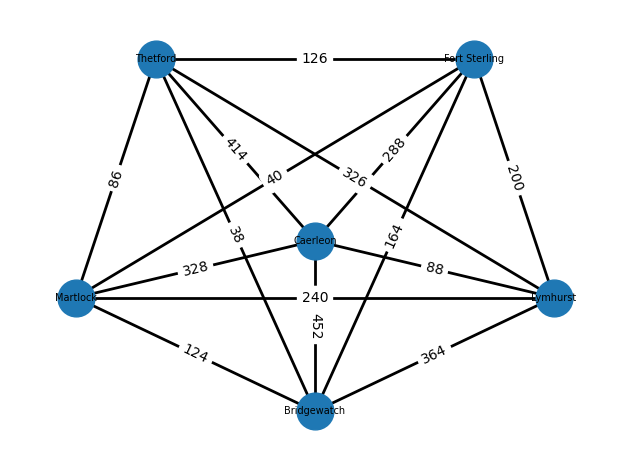

In [149]:
#постройка графа
#ребра - разность

pos = pos2

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=7, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [150]:
for i in combinations(cities, 2):
    difference = int(db_read['sell_price_min'].loc[db_read['city'] == i[0]]) - int(db_read['buy_price_max'].loc[db_read['city'] == i[1]])
    if difference < 0:
        difference = int(db_read['sell_price_min'].loc[db_read['city'] == i[1]]) - int(db_read['buy_price_max'].loc[db_read['city'] == i[0]])
    G.edges[i]['weight'] = difference

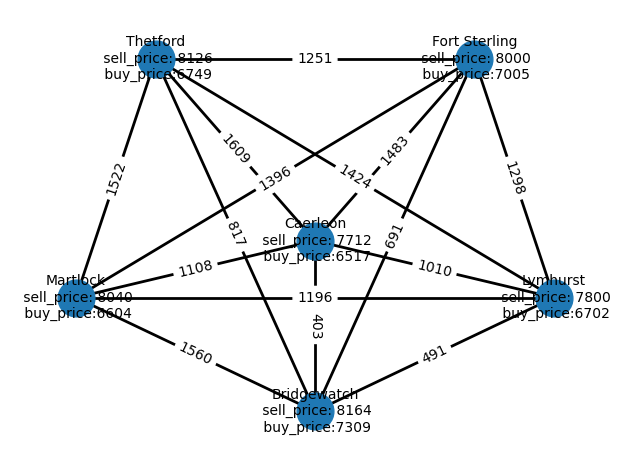

In [151]:
pos = pos2

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=2)
node_labels = nx.get_node_attributes(G, 'attr')
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif", labels = node_labels)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Карлион граф

In [267]:
G_Caer = nx.DiGraph()
Caer_cities = [('Fort Sterling', 'Caerleon'), ('Thetford', 'Caerleon'), ('Lymhurst', 'Caerleon'), ('Bridgewatch', 'Caerleon'), ('Martlock', 'Caerleon')]
G_Caer.add_nodes_from(cities)
G_Caer.add_edges_from(Caer_cities)

In [274]:
for i in Caer_cities:
    difference = int(db_read['sell_price_min'].loc[db_read['city'] == i[0]]) - int(db_read['buy_price_max'].loc[db_read['city'] == i[1]])
    G_Caer.edges[i]['weight'] = difference
    print(difference)

1483
1609
1283
1647
1523


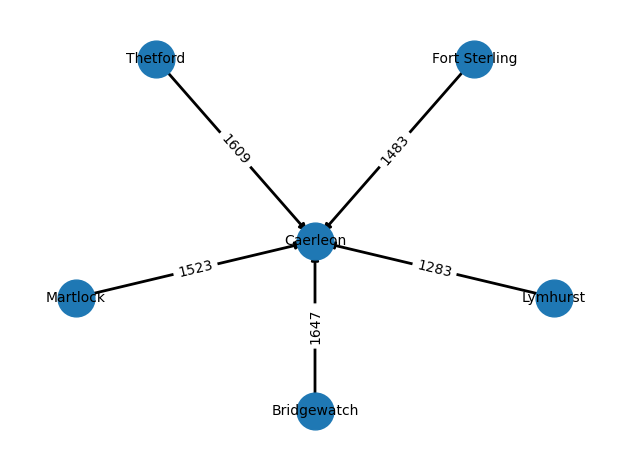

In [271]:
pos = pos2

nx.draw_networkx_nodes(G_Caer, pos, node_size=700)
nx.draw_networkx_edges(G_Caer, pos, width=2)

nx.draw_networkx_labels(G_Caer, pos, font_size=10, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G_Caer, "weight")
nx.draw_networkx_edge_labels(G_Caer, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [155]:
nx.get_edge_attributes(G_Caer, "weight")

{('Fort Sterling', 'Caerleon'): 1483,
 ('Thetford', 'Caerleon'): 1609,
 ('Lymhurst', 'Caerleon'): 1283,
 ('Bridgewatch', 'Caerleon'): 1647,
 ('Martlock', 'Caerleon'): 1523}

# Линейная регрессия

In [9]:
#T5_BAG
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

In [10]:
conn = connect('Albion_Data.db')
query = "SELECT * FROM T5_BAG_FORMATED"
db_lin_data = pd.read_sql(query ,conn)

In [22]:
db_lin_data

,item_id,city,price,date
0,T5_BAG,Bridgewatch,10474,3.0
1,T5_BAG,Bridgewatch,10500,8.0
2,T5_BAG,Bridgewatch,10677,8.0
3,T5_BAG,Bridgewatch,17974,2.0
4,T5_BAG,Bridgewatch,19984,4.0
...,...,...,...,...
333,T5_BAG,Lymhurst,11483,169.0
334,T5_BAG,Lymhurst,11852,173.0
335,T5_BAG,Martlock,12928,170.0
336,T5_BAG,Martlock,12934,170.0


<AxesSubplot: xlabel='date', ylabel='price'>

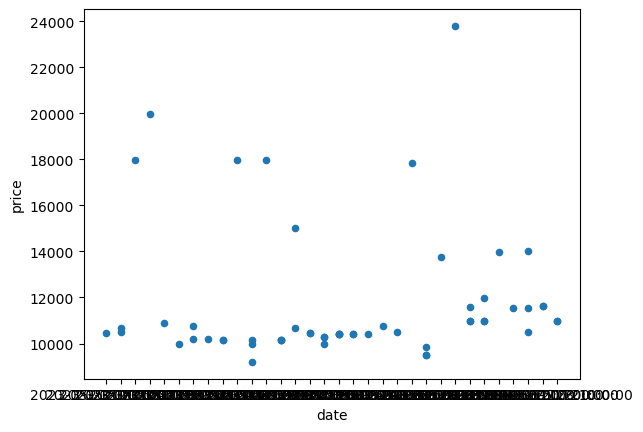

In [12]:
db_lin_data[['price', 'date']].loc[db_lin_data.city == 'Bridgewatch'].plot.scatter(x = 'date', y = 'price')

In [13]:
model = LinearRegression()
model

LinearRegression()

In [14]:
#энкодим название предмета и город
columns_to_encode = ['date']

for col in columns_to_encode:
    db_lin_data[col] = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1).fit_transform(db_lin_data[col].values.reshape(-1, 1))

In [15]:
x, y = db_lin_data[db_lin_data['city'] == 'Bridgewatch'].drop(columns=["item_id", "city", "price"]), db_lin_data['price'].loc[db_lin_data['city'] == 'Bridgewatch']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [17]:
y_train

262    10984
188    10423
62     17959
323    10987
81      9200
285    10500
286    11560
166    10430
3      17974
210    17861
222     9487
243    11591
1      10500
144    10270
24      9998
223     9487
2      10677
145    10275
41     10200
82     10000
104    10158
186    10430
242    10995
122    10666
143     9975
123    10448
167    10423
284    11555
226    23797
80     10163
43     10781
60     10149
306    11646
209    10487
207    10432
103    10152
102    10146
322    11646
208    10770
23     10898
124    10458
287    13999
Name: price, dtype: int64

In [18]:
pf=PolynomialFeatures()
x_poly=pf.fit_transform(x_train) 
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)

In [20]:
df_score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df_score

Mean Absolute Error: 2171.1121849016813
Mean Squared Error: 10140334.483600087
Root Mean Squared Error: 3184.3891853226874


,Actual,Predicted
263,11989,11529.187618
261,10989,11529.187618
0,10474,11302.556553
187,10415,11469.467270
83,17959,11376.058520
264,13995,11524.593745
4,19984,11304.087844
241,10992,11512.343418
165,10430,11463.342106
61,10159,11360.745611


<Figure size 640x480 with 0 Axes>

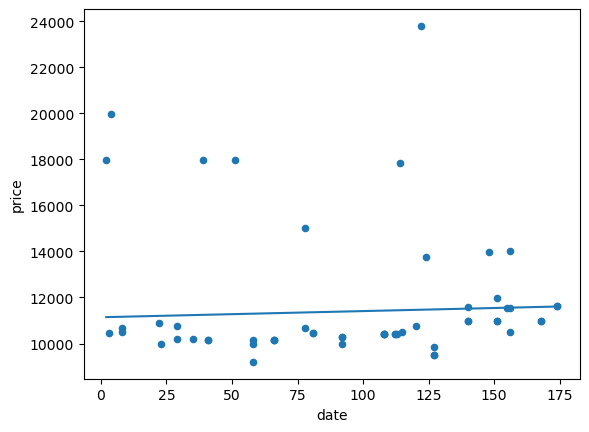

In [310]:
fig = plt.figure()

model_a = model.coef_[0]
model_b = model.intercept_

x= np.arange(db_lin_data['date'].loc[db_lin_data.city == 'Bridgewatch'].min(),db_lin_data['date'].loc[db_lin_data.city == 'Bridgewatch'].max())
model_y_sk = -model_a * x + model_b-1000


db_lin_data[['price', 'date']].loc[db_lin_data.city == 'Bridgewatch'].plot.scatter(x = 'date', y = 'price')
plt.plot(x, model_y_sk)
plt.show()